## Probabilidade

In [1]:
# Importações
import math
import numpy as np
from scipy import stats
import seaborn as sns

### Permutação

In [2]:
# Fatorial de 3
math.factorial(3)

6

In [3]:
# Permutação sem repetição
math.factorial(36) / math.factorial(36 - 5)

45239040.0

In [4]:
# Permutação com repetição
math.pow(36, 5)

60466176.0

### Combinação

In [5]:
# Combinação sem repetição 
math.factorial(6) / (math.factorial(2) * math.factorial(6 - 2))

15.0

In [6]:
# Combinação com repetição 
math.factorial(6 + 2 - 1) / (math.factorial(2) * math.factorial(6 - 1))

21.0

### Interseção, União e Diferença

In [7]:
# Criando os conjuntos
a = (0, 1, 2, 3, 4, 5, 6, 7)
b = (0, 2, 4, 6, 8, 10, 12, 14)

#### Interseção

In [8]:
# Interseção com a e b
set(a) and set(b)

{0, 2, 4, 6, 8, 10, 12, 14}

#### União

In [9]:
# União de a com b
set(a) | set(b)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14}

#### Diferença

In [10]:
# diferença de a em b
set(a).difference(set(b))

{1, 3, 5, 7}

In [11]:
# diferença de b em a
set(b).difference(set(a))

{8, 10, 12, 14}

## Probabilidade e distribuição normal
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [12]:
# Criando a base de dados
dados = np.array(
    [
        126., 129.5, 133., 133., 136.5, 136.5, 140., 140., 140.,
        140., 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147., 147.,
        147., 147., 147., 147., 147., 150.5, 150.5, 150.5, 150.5,
        150.5, 150.5, 150.5, 150.5, 154., 154., 154., 154., 154.,
        154., 154., 154., 154., 157.5, 157.5, 157.5, 157.5, 157.5,
        157.5, 157.5, 157.5, 157.5, 157.5, 161., 161., 161., 161.,
        161., 161., 161., 161., 161., 161., 164.5, 164.5, 164.5,
        164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168., 168., 168.,
        168., 168., 168., 168., 168., 171.5, 171.5, 171.5, 171.5,
        171.5, 171.5, 171.5, 175., 175., 175., 175., 175., 175.,
        178.5, 178.5, 178.5, 178.5, 182., 182., 185.5, 185.5, 189.,
        192.5
    ]
)

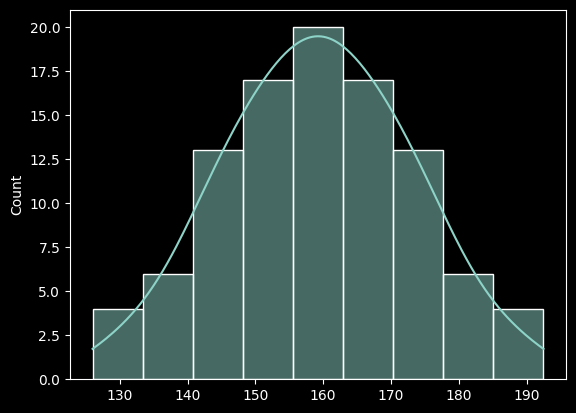

In [13]:
# Gráfico dos dados
sns.histplot(dados, kde=True);

In [14]:
# Média e Desvio Padrão
media = np.mean(dados)
dp = np.std(dados)
media, dp

(159.25, 13.65)

In [15]:
# Os Quantil
np.quantile(dados, [0.25, 0.50, 0.75])

array([150.5 , 159.25, 168.  ])

### Calcular a probabilidade de selecionar uma pessoa em Q1

In [16]:
# posição na tabela z
(150.5 - media) / dp

-0.641025641025641

In [17]:
# Calculo com a biblioteca stats.norm
stats.norm.cdf(150.5, media, dp)

0.26075301195608336

### Calcular a probabilidade de selecionar uma pessoa em Q3

In [18]:
# posição na tabela z
(168 - media) / dp

0.641025641025641

In [19]:
# Valor normal
1 - 0.73891

0.26109000000000004

In [20]:
# Calculo com gambiarra 
1 - stats.norm.cdf(168, media, dp)

0.26075301195608336

In [21]:
# Calculo mais apropriado 
stats.norm.sf(168, media, dp)

0.26075301195608336

### Calcular a probabilidade de selecionar uma pessoa entre Q2 e Q3

In [22]:
# posição na tabela z do Q3
(168 - media) / dp

0.641025641025641

In [23]:
# posição na tabela z do Q2
(159.25 - media) / dp

0.0

In [24]:
# Probabilidade de selecionar da média do Q2 até o Q3
0.73891 - 0.50

0.23890999999999996

In [25]:
# Calculo Q3
stats.norm.cdf(168, media, dp)

0.7392469880439166

In [26]:
# Calculo Q2
stats.norm.cdf(159.25, media, dp)

0.5

In [27]:
# Q2 & Q3
stats.norm.cdf(168, media, dp) - stats.norm.cdf(159.25, media, dp)

0.23924698804391664

### Calcular a probabilidade de selecionar uma pessoa em Q1 ou Q3

In [28]:
# Calculo
0.26109 + 0.26109

0.52218

### Calcular a probabilidade de não selecionar uma pessoa em Q1 ou Q3

In [29]:
1 - 0.52218

0.47782